<a href="https://colab.research.google.com/github/AeschlimannMichael/data-science-fundamentals/blob/main/Michael_Aeschlimann_Codingtask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Columns: 3650 entries, Unnamed: 0 to 780.0381
dtypes: float64(3648), int64(1), object(1)
memory usage: 9.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


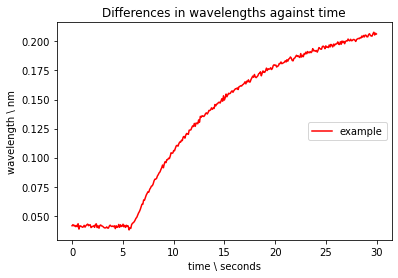

<Figure size 480x320 with 0 Axes>

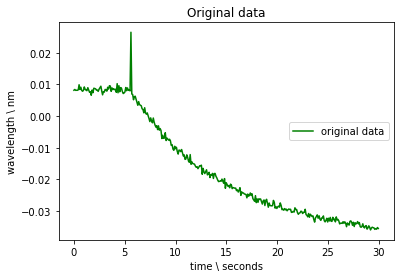

<Figure size 480x320 with 0 Axes>

In [5]:
import numpy as np
import pandas as pd 

from google.colab import drive
drive.mount('/content/drive')
path_one = '/content/drive/MyDrive/data science data/4ms_10 av_30 s_Absorbance_10-32-04-868 (1).txt'
df = pd.read_csv(path_one, delimiter= "\t", header=13)
df.head()
df.info()
df.to_csv(r'/content/drive/MyDrive/data science data/4ms_10 av_30 s_Absorbance_10-32-04-868 (1).csv')
df.iloc[1,10]
df.columns[10]

df = df.drop(columns = "Unnamed: 0") 
df = df.rename(columns={"Unnamed: 1": "time"}) 
time = df.iloc[:,0]
time_zero = time[0]
for i in range(len(time)):
 time[i] = time[i] - time_zero


import matplotlib.pyplot as plt
x = (df.iloc[:,0])/1000
y=df.iloc[:,1950]
y_diff = -(df.iloc[:,1950]-df.iloc[:,1800])
plt.plot(x,y_diff, color='red', label='example')
plt.title('Differences in wavelengths against time')
plt.xlabel('time \ seconds')
plt.ylabel('wavelength \ nm')
plt.legend(loc='center right')
plt.figure(figsize=(6,4),dpi=80)
plt.show()
plt.savefig('Experiment1.png')
plt.plot(x,y,color='green', label='original data')
plt.title('Original data')
plt.xlabel('time \ seconds')
plt.ylabel('wavelength \ nm')
plt.legend(loc='center right')
plt.figure(figsize=(6,4),dpi=80)
plt.show()